# Assignment: Binary Recommendation System with Neural Networks

## Objective:

- This part (the code, and how well it runs) will be considered Project 3 --

- Let every row in the attached CSV file (dataframe.csv) represent a user in an app. Your goal is to write a NN that can predict feature_0 for a simulated (you generate it) new user. The question at hand: what value would you predict the new (simulated) user's feature_0 to be?

- Write and implement a recommendation system (code it) using a neural network on binary-valued data and compare its performance with randomly generated data. Submit a Jupyter notebook that includes your report (explained in the Submission Guidelines) either at the end of your program, separately in a different file, or with paragraphs among your code as a continuous explanation.

## Tasks:

### Data Preparation:

- Upload  a binary-valued dataset mimicking user-item interactions (e.g., 1 for interaction, 0 for no interaction).
- Create training and testing sets from the dataset.

### Neural Network Model:

- Design a neural network architecture suitable for a recommendation system using binary-valued data.
- Implement the model using a framework of your choice (TensorFlow, PyTorch, etc.).

### Training the Recommendation System:

- Train the neural network on the training dataset to predict feature_0.
- Experiment with hyperparameters (e.g., learning rate, number of layers, neurons per layer) to optimize the model's performance.

### Evaluation:
        
- Evaluate the model on the test dataset using appropriate evaluation metrics (e.g., accuracy, precision, recall).
        Visualize and interpret the model's performance metrics.

### Random Data Comparison:

- Generate a completely random binary-valued dataset of the same size and characteristics as the original dataset.
        Train and evaluate the same neural network architecture on this random dataset.

### Analysis and Comparison:

- Compare the performance metrics obtained from the neural network trained on real data versus the random data.
- Discuss and interpret the differences in performance between the two scenarios.
- Provide insights into why the recommendation system performs differently on real data compared to random data.

## Submission Guidelines (Quiz 3 + Final):

- This next section (the report) where you explain your work will be considered quiz 3 + the final exam --

- Submit a report detailing:
  - Description of the generated dataset.
  - Architecture and details of the neural network model. (Please DRAW your Neural Network, including all the layers    and activation functions)
  - Training methodology and hyperparameters used. (Explain each hyperparameter)
  - Evaluation metrics and their interpretation.
  - Comparison and analysis of the model's performance on real data vs. random data.
  - Include visualizations, code snippets, and any relevant graphs to support your findings.

## Grading Criteria:

- Data generation and preprocessing accuracy.
- Implementation and understanding of the neural network architecture.
- Model training and optimization techniques.
- Evaluation metrics and their interpretation.
- Clarity and depth of the comparison between real and random data.

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras import regularizers
import tensorflow as tf

# Load data from CSV
data = pd.read_csv('dataframe.csv')

# 'feature_0' is the target and columns are 'feature_1', 'feature_2', ...
features = data.drop('feature_0', axis=1)
target = data['feature_0']

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=100)

In [67]:
# Define the neural network architecture
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Sequential

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# The Dropout layer used to prevent overfitting in neural networks.
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 512)               36864     
                                                                 
 batch_normalization_28 (Ba  (None, 512)               2048      
 tchNormalization)                                               
                                                                 
 dropout_35 (Dropout)        (None, 512)               0         
                                                                 
 dense_43 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_29 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dropout_36 (Dropout)        (None, 256)              

In [68]:
from keras.callbacks import EarlyStopping, TensorBoard
from datetime import datetime

# Define the Keras TensorBoard callback.


# Early Stopping: Monitor validation loss and stop training when it starts to increase to prevent overfitting.
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [69]:
from keras import optimizers

learning_rate = .00001
model.compile(optimizer=optimizers.legacy.Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir)

# Fitting the model with data augmentation
batch_size = 300
epochs = 100
steps_per_epoch = x_train.shape[0] // batch_size

history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    steps_per_epoch=steps_per_epoch,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, tensorboard_callback])

Epoch 1/100
1/1 [==============================] - 0s 493ms/step - loss: 7.4160 - accuracy: 0.5167 - val_loss: 7.6606 - val_accuracy: 0.4918
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 7.3769 - accuracy: 0.5106 - val_loss: 7.6553 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 7.4515 - accuracy: 0.5067 - val_loss: 7.6234 - val_accuracy: 0.5082
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 7.5235 - accuracy: 0.4415 - val_loss: 7.5812 - val_accuracy: 0.5164
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 7.3534 - accuracy: 0.5267 - val_loss: 7.5353 - val_accuracy: 0.5082
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 7.4853 - accuracy: 0.4681 - val_loss: 7.4967 - val_accuracy: 0.5082
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 7.4815 - accuracy: 0.4967 - val_loss: 7.4664 - val_accuracy: 0.5164
Epoch 8/100
1/1 [==

1/1 [==============================] - 0s 21ms/step - loss: 7.2602 - accuracy: 0.5433 - val_loss: 7.0772 - val_accuracy: 0.4918
Epoch 60/100
1/1 [==============================] - 0s 19ms/step - loss: 7.3885 - accuracy: 0.4787 - val_loss: 7.0748 - val_accuracy: 0.4918
Epoch 61/100
1/1 [==============================] - 0s 21ms/step - loss: 7.5060 - accuracy: 0.4267 - val_loss: 7.0724 - val_accuracy: 0.4918
Epoch 62/100
1/1 [==============================] - 0s 19ms/step - loss: 7.3637 - accuracy: 0.5213 - val_loss: 7.0700 - val_accuracy: 0.4918
Epoch 63/100
1/1 [==============================] - 0s 21ms/step - loss: 7.3814 - accuracy: 0.5133 - val_loss: 7.0677 - val_accuracy: 0.4918
Epoch 64/100
1/1 [==============================] - 0s 19ms/step - loss: 7.5925 - accuracy: 0.4468 - val_loss: 7.0653 - val_accuracy: 0.4918
Epoch 65/100
1/1 [==============================] - 0s 21ms/step - loss: 7.4034 - accuracy: 0.5100 - val_loss: 7.0631 - val_accuracy: 0.4918
Epoch 66/100
1/1 [========

In [70]:
loss_and_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy for the real data: {loss_and_acc[1]*100:.2f}%')
print(f'Test loss: {loss_and_acc[0]:.4f}')

4/4 [==============================] - 0s 1ms/step - loss: 7.0158 - accuracy: 0.5164
Test accuracy for the real data: 51.64%
Test loss: 7.0158


In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

def createHistoryPlot(history): 
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

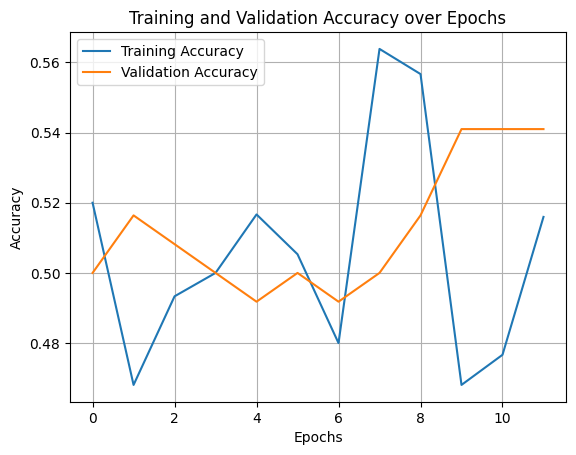

In [60]:
createHistoryPlot(history)

## Random Data Comparison

### Generate the data 

In [61]:
import numpy as np
import pandas as pd

# Generating random binary data for the DataFrame
num_rows = 610  # Number of rows in the DataFrame
num_columns = 71  # Number of columns with binary data

# Generating random binary values for the DataFrame
data = np.random.randint(0, 2, size=(num_rows, num_columns))

# Creating the DataFrame
columns = [f"feature_{i}" for i in range(num_columns)]  # Column names
df = pd.DataFrame(data, columns=columns)

df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70
0,0,0,1,0,0,0,0,1,1,0,...,1,0,0,0,1,1,1,0,0,0
1,1,0,1,1,1,0,1,0,1,0,...,1,0,1,1,1,1,1,1,0,1
2,0,1,1,0,1,1,0,1,0,0,...,0,1,0,1,0,1,0,1,0,1
3,0,1,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1,1,1,1,0,0,1,1,0,1,...,0,0,0,1,1,1,1,1,1,1


In [62]:
# Splitting the data into features (X) and target (y)
X = df.drop('feature_0', axis=1)  # Features
y = df['feature_0']  # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Build a simple neural network model using Keras
model2 = Sequential()
model2.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))
model2.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# The Dropout layer used to prevent overfitting in neural networks.
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

In [64]:
# Train the model
model2.compile(optimizer=optimizers.legacy.Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the model with data augmentation
batch_size = 300
epochs = 100
steps_per_epoch = X_train.shape[0] // batch_size

history = model2.fit(X_train, 
                    y_train, 
                    batch_size=batch_size, 
                    steps_per_epoch=steps_per_epoch,
                    epochs=epochs,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])


Epoch 1/100
1/1 [==============================] - 1s 501ms/step - loss: 7.6301 - accuracy: 0.5067 - val_loss: 7.1172 - val_accuracy: 0.5164
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 7.5172 - accuracy: 0.5319 - val_loss: 7.1162 - val_accuracy: 0.4836
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 7.4821 - accuracy: 0.5167 - val_loss: 7.1154 - val_accuracy: 0.4672
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 7.5645 - accuracy: 0.4947 - val_loss: 7.1146 - val_accuracy: 0.4590
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 7.5399 - accuracy: 0.5200 - val_loss: 7.1137 - val_accuracy: 0.4672
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 7.5804 - accuracy: 0.4574 - val_loss: 7.1127 - val_accuracy: 0.4918
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 7.5131 - accuracy: 0.5033 - val_loss: 7.1119 - val_accuracy: 0.4836
Epoch 8/100
1/1 [==

1/1 [==============================] - 0s 18ms/step - loss: 7.5240 - accuracy: 0.5067 - val_loss: 7.0954 - val_accuracy: 0.5328
Epoch 60/100
1/1 [==============================] - 0s 16ms/step - loss: 7.5385 - accuracy: 0.4840 - val_loss: 7.0952 - val_accuracy: 0.5246
Epoch 61/100
1/1 [==============================] - 0s 18ms/step - loss: 7.4756 - accuracy: 0.5067 - val_loss: 7.0951 - val_accuracy: 0.5246
Epoch 62/100
1/1 [==============================] - 0s 16ms/step - loss: 7.5327 - accuracy: 0.4947 - val_loss: 7.0948 - val_accuracy: 0.5328
Epoch 63/100
1/1 [==============================] - 0s 18ms/step - loss: 7.5953 - accuracy: 0.4933 - val_loss: 7.0946 - val_accuracy: 0.5328
Epoch 64/100
1/1 [==============================] - 0s 18ms/step - loss: 7.4363 - accuracy: 0.4681 - val_loss: 7.0944 - val_accuracy: 0.5410
Epoch 65/100
1/1 [==============================] - 0s 19ms/step - loss: 7.4007 - accuracy: 0.5233 - val_loss: 7.0941 - val_accuracy: 0.5410
Epoch 66/100
1/1 [========

In [65]:
# Evaluate the model
loss_and_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy for the random data: {loss_and_acc[1]*100:.2f}%')
print(f'Test loss: {loss_and_acc[0]:.4f}')

4/4 [==============================] - 0s 1ms/step - loss: 7.0981 - accuracy: 0.4918
Test accuracy for the random data: 49.18%
Test loss: 7.0981


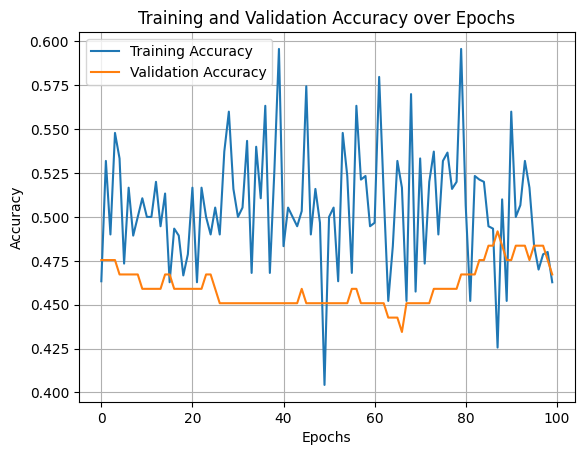

In [53]:
createHistoryPlot(history)